In [1]:
#pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import permutation_test
from mlxtend.evaluate import permutation_test as mlxtend_perm_test

### Introduction

On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all seven crew members on board. An investigation into the cause of the disaster focused on a critical seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may be related to the ambient temperature during the launch. The table below summarizes observational data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at the time of the launch. 


A data frame with 23 observations on the following 4 variables:
- mission: Shuttle mission number.
- temperature: Temperature, in Fahrenheit.
- damaged: Number of damaged O-rings (out of 6).
- undamaged: Number of undamaged O-rings (out of 6).

We are interested in evaluating the correlation $\rho$ for the temperature and the number of damaged O-rings. Also, we have the hypothesis test problem of
$$H_0 : \rho = 0 \text{ v.s. } H_1 : \rho \neq 0.$$
In words, we have the null hypothesis of no correlation between temperature and number of damaged O-rings. Against the alternative hypothesis of correlated variables which could be a indicator of causality.

In [3]:
# Load Dataset
orings_df = pd.read_csv(r'C:\Users\luis9\OneDrive\Datos\orings.csv')

# Extract Data
n = orings_df.shape[0]
x = orings_df['temperature'].values
y = orings_df['damaged'].values

# Print Dataset
orings_df

,mission,temperature,damaged,undamaged
0,1,53,5,1
1,2,57,1,5
2,3,58,1,5
3,4,63,1,5
4,5,66,0,6
5,6,67,0,6
6,7,67,0,6
7,8,67,0,6
8,9,68,0,6
9,10,69,0,6


Text(0, 0.5, 'Number of damaged O-rings (out of 6)')

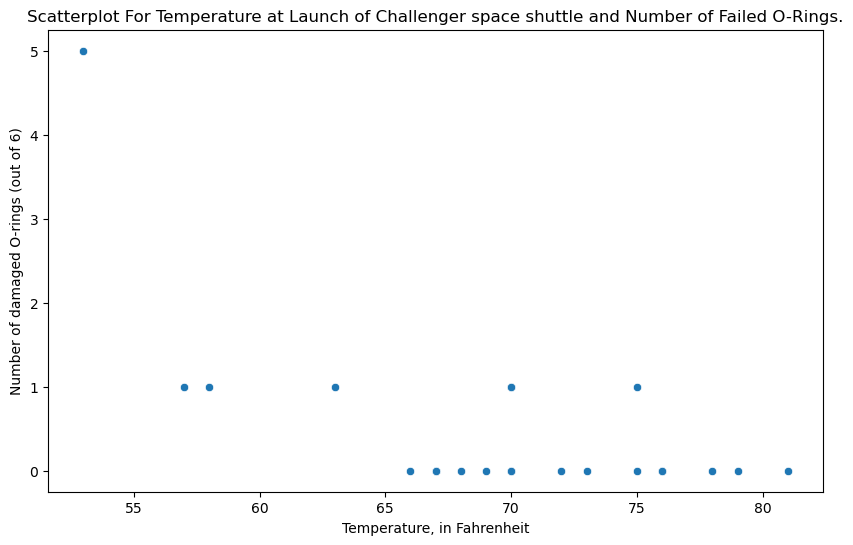

In [4]:
plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(x=x,y=y)

plt.title('Scatterplot For Temperature at Launch of Challenger space shuttle and Number of Failed O-Rings.')
plt.xlabel('Temperature, in Fahrenheit')
plt.ylabel('Number of damaged O-rings (out of 6)')

Let $\rho$ be the Pearson correlation coeficient and $r$ be the estimate for $\rho$.

For data that follow a bivariate normal distribution, the exact density function f(r) for the sample correlation coefficient r of a normal bivariate is

$${\displaystyle f(r)={\frac {(n-2)\,\mathrm {\Gamma } (n-1)(1-\rho ^{2})^{\frac {n-1}{2}}(1-r^{2})^{\frac {n-4}{2}}}{{\sqrt {2\pi }}\,\mathrm {\Gamma } (n-{\tfrac {1}{2}})(1-\rho r)^{n-{\frac {3}{2}}}}}{}_{2}\mathrm {F} _{1}{\bigl (}{\tfrac {1}{2}},{\tfrac {1}{2}};{\tfrac {1}{2}}(2n-1);{\tfrac {1}{2}}(\rho r+1){\bigr )}}$$

where $\Gamma$ is the gamma function and ${\displaystyle {}_{2}\mathrm {F} _{1}(a,b;c;z)}$ is the Gaussian hypergeometric function. In the special case when $ \rho = 0$ (zero population correlation), the exact density function $f(r)$ can be written as:
$${\displaystyle f(r)={\frac {\left(1-r^{2}\right)^{\frac {n-4}{2}}}{\mathrm {B} \left({\tfrac {1}{2}},{\tfrac {1}{2}}(n-2)\right)}}.}$$
This allows us to construct a $p$-value to test the hypothesis of interest of no correlation between temperature and number of failed O-rings.

In [5]:
# Compute correlation and p-value
r = pearsonr(x,y)[0]
pearsonr(x,y)

PearsonRResult(statistic=-0.6384574345662328, pvalue=0.0010434842063727356)

So the estimate for $\rho$ is $r = -0.6384$ which tells us that there evidence of a inverse relationship between temperature at launch and number of failed O-rings, that is, when the temperature at launch is low, then there are more failed O-rings. 

The $p$-value of 0.00104 tell us that there is very strong evidence against $H_0 : \rho = 0$. Now, let us construct a confidence interval for $\rho$ to better evaluate the uncertainty around the estimation.

### Confidence Interval For Correlation Coeficient with Fisher's Method

The correlation coefficient $r$ can be studentized by dividing it by its standard error given by 
$$ {\displaystyle \sigma _{r}={\sqrt {\frac {1-r^{2}}{n-2}}}},$$
that is, we consider the variable
$$ {\displaystyle t = t_r = {\frac {r}{\sigma _{r}}}=r{\sqrt {\frac {n-2}{1-r^{2}}}}}.$$
The distribution for $t$ is a $t-Student$ distribution, with $n-1$ degrees of freedom, in the null case $\rho = 0$. This holds approximately in case of non-normal observed values if sample sizes are large enough.

Suppose the number $a$ is so chosen that
$$ P(-a < T < a) = 1-\alpha, \quad \alpha \in (0,1),$$
when T has a t-distribution with n − 1 degrees of freedom. By symmetry, this is the same as saying that $a$ satisfies
$$ P(T < a) = 1-\alpha/2, $$
so $s$ is the "$1-\alpha/2$-th percentile" of this probability distribution, that is, $a = t_{\alpha/2, n-1}$. Then,
$${\displaystyle P \left(-a < t < a \right) = 1-\alpha,}$$
which is equivalent to 
$${\displaystyle P \left(-a < r \sqrt{\frac{n-2}{1-r^2}} < a \right) = 1-\alpha,}$$
if and only if 
$${\displaystyle P \left(-a \frac{1}{\sqrt{n-2}} <  \frac{r}{\sqrt{1-r^2}} < a \frac{1}{\sqrt{n-2}} \right) = 1-\alpha.}$$
From this last equation we see that it is difficult to find the confidence interval for the population correlation coefficient.

In practice, confidence intervals and hypothesis tests relating to ρ are usually carried out using the Fisher transformation, $\phi$:
$${\displaystyle \phi(r)\equiv {\tfrac {1}{2}}\,\ln \left({\frac {1+r}{1-r}}\right)=\operatorname {artanh} (r)}.$$
It is known that 
$$\phi(r) \xrightarrow{d} N\left(\phi(\rho), \frac{1}{n-3}\right),$$
where $\rho$ denotes the population correlation coefficient and $\xrightarrow{d}$ denotes convergence in distribution. So the Fisher transformations gives us a Normal approximation which allows us to compute an approximate confidence interval.
Using the approximation, a $z$-score is 
$$ z = \frac{\phi(r)-\phi(\rho)}{se(\phi(r))} = \sqrt{n-3}\left(\phi(r) - \phi(\rho)\right).$$
Which holds for $n > 3$ and under the assumption that the sample pairs are independent and identically distributed and follow a bivariate normal distribution.

To obtain a confidence interval for ρ, we first compute a confidence interval with coverage $1-\alpha$ for $\phi(\rho))$ given by
$$phi(\rho) \in [\phi(r) \pm z_{\alpha/2} se(\phi(r))].$$
The inverse Fisher transformation $\phi^{-1}$ or $tanh$ brings the interval back to the correlation scale
$$\rho \in [\phi^{-1}(\phi(r) - z_{\alpha/2} se(\phi(r))), \phi^{-1}(\phi(r) + z_{\alpha/2} se(\phi(r))) ].$$


In [6]:
alpha = 0.05
phi_r = np.arctanh(r)
se    = 1/np.sqrt(n-3)
z     = norm.ppf(1-alpha/2)
l_z, u_z = phi_r-z*se, phi_r+z*se
l_z, u_z

(-1.1938266243563098, -0.3173040837797283)

In [7]:
low, upp = np.tanh((l_z, u_z))
low, upp

(-0.8317618872284532, -0.30706722925115965)

So, the 95% confidence interval for $\rho$ is $[-0.8317, -0.3070]$ which tells us that there is a lot of evidence of the inverse relationship that we discussed earlier.

But, the $p$-value given before and this confidence interval rests on the assumption of bi-variate normal data. And since this is assumption is not met, there could be doubt arround the validity of these values obtained from the sample.

Now, let us use non-parametric methods to evaluate our hypothesis.

### Confidence Interval For Correlation Coeficient with Bootstrap
The bootstrap can be used to construct confidence intervals for Pearson's correlation coefficient. In the "non-parametric" bootstrap, $n$ pairs $(x_i, y_i)$ are resampled "with replacement" from the observed set of $n$ pairs, and the correlation coefficient $r$ is calculated based on the resampled data. This process is repeated a large number of times, and the empirical distribution of the resampled $r$ values are used to approximate the sampling distribution of the statistic. A 95% confidence interval for $\rho$ can be defined as the interval spanning from the 2.5th to the 97.5th percentile of the resampled $r$ values.

In [8]:
# configure bootstrap
B = 10000
data = np.array([x,y])
statistics_boot = np.zeros(B)

# execute bootstrap
for i in range(B):
    boot_sample = resample(data)
    boot_stat   = pearsonr(x = boot_sample[0], y = boot_sample[1])[0]
    statistics_boot[i] = boot_stat

statistics_boot

array([-0.63845743,  1.        , -0.63845743, ..., -0.63845743,
        1.        ,  1.        ])

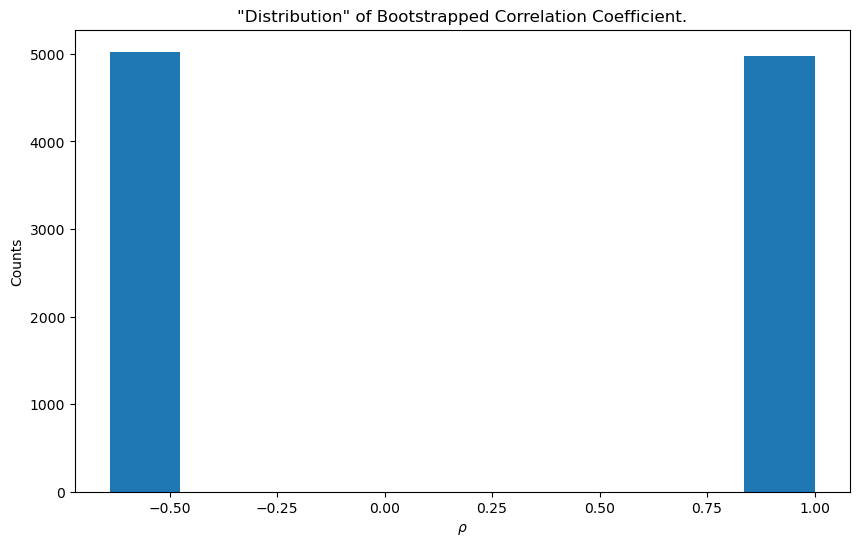

In [9]:
plt.subplots(1, 1, figsize=(10,6))
plt.hist(statistics_boot)
plt.title('\"Distribution\" of Bootstrapped Correlation Coefficient.')
plt.xlabel(r'$\rho$')
plt.ylabel('Counts');

In [10]:
# Bootstrap Percentil confidence interval at level 0.95
np.quantile(statistics_boot, 0.025), np.quantile(statistics_boot, 0.975)

(-0.6384574345662328, 0.9999999999999998)

Since our sample size is small and there is only one observation of high failures (one observation where the number of failed O-rings is 5 out of 6), the bootstrap doesn't perfom very well and gives us a confidence interval [-0.6384, 0.999] with 95% coverage and this contains the null value $\rho = 0$ at a level $0.05$ for the hypothesis test (by the inversion of confidence intervals and hypothesis tests). But again, this is to the limited information in the sample that is given by the nature of the data. 

Let us try a better approximation method in the form of a permutation test for the correlation coefficient.

### Back to Hypothesis Testing with a Permutation Test

Permutation tests provide a direct approach to performing hypothesis tests and constructing confidence intervals. A permutation test for Pearson's correlation coefficient involves the following two steps:

1. Using the original paired data $(x_i, y_i)$, randomly redefine the pairs to create a new data set $(x_{i'}, y_{i'})$, where the i′ are a permutation of the set $\{1,\ldots,n\}$. The permutation $i′$ is selected randomly, with equal probabilities placed on all n! possible permutations. This is equivalent to drawing the $i′$ randomly without replacement from the set $\{1,\ldots,n\}$. In bootstrapping, a closely related approach, the $i$ and the $i′$ are equal and drawn with replacement from $\{1,\ldots,n\}$.
2. Construct a correlation coefficient r from the randomized data.

To perform the permutation test, repeat steps (1.) and (2.) a large number of times. The p-value for the permutation test is the proportion of the r values generated in step (2.) that are larger than the Pearson correlation coefficient that was calculated from the original data. Here "larger" can mean either that the value is larger in magnitude, or larger in signed value, depending on whether a two-sided or one-sided test is desired. 

In [11]:
# Permutation Test for the Pearson correlation coefficient with scipy.stats
def statistic(x, y):
    return pearsonr(x, y).statistic

res = permutation_test((x, y), statistic, vectorized=False,
                       permutation_type='pairings',
                       n_resamples = 10000,
                       alternative = 'two-sided')

r, pvalue, null = res.statistic, res.pvalue, res.null_distribution


r, pvalue

(-0.6384574345662328, 0.001999800019998)

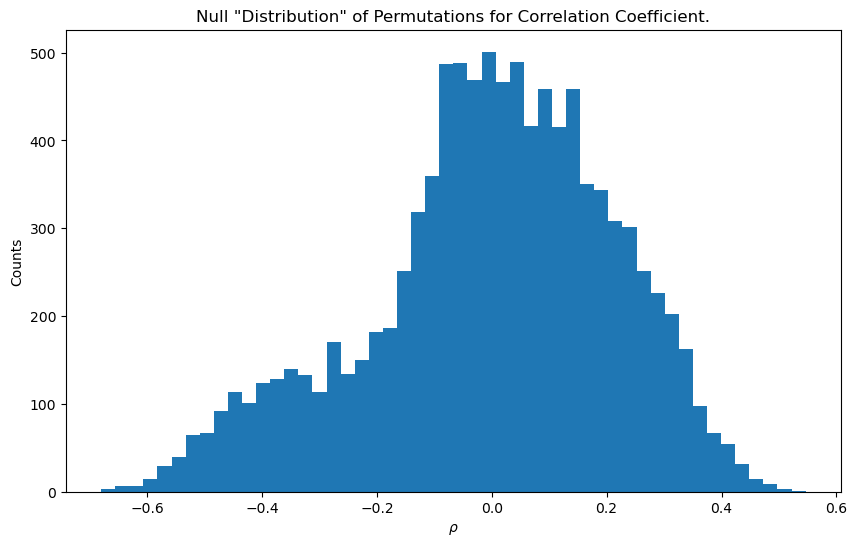

In [12]:
plt.subplots(1, 1, figsize=(10,6))
plt.hist(res.null_distribution, bins=50)
plt.title('Null \"Distribution\" of Permutations for Correlation Coefficient.')
plt.xlabel(r'$\rho$')
plt.ylabel('Counts');

In [13]:
# Permutation Test for the Pearson correlation coefficient with mlxtend
mlxtend_p_value = mlxtend_perm_test(x, y,
                           func = statistic,
                           method='approximate',
                           num_rounds=10000,
                           paired = True)

print(mlxtend_p_value)

9.999000099990002e-05


Now, the permutation hypothesis test for the Pearson correlation coefficient allows us to reject $H_0$ since the p-value is very small. And this test has the advantage of being non-parametric, that is, we don't require the data to be bivariate normal.

### Conclusion

There is evidence for the inverse relationship between the number of failed O-rings and the temperature at launch. So, in order to prevent the failure of O-rings the temperature has to be more controlled (that is, cancel the launch if the temperature is too low).